In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
import random

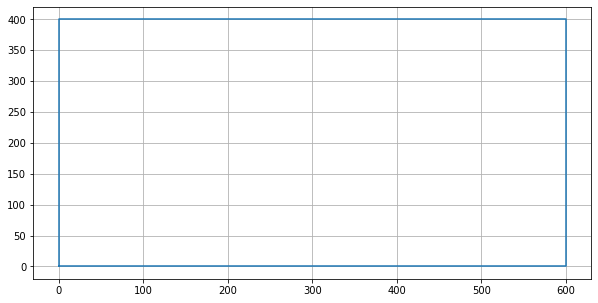

In [3]:
size_pazzle = (600, 400)

plt.figure(figsize=(10, 5))
plt.plot([0, 0, size_pazzle[0], size_pazzle[0], 0],
         [0, size_pazzle[1], size_pazzle[1], 0, 0])
plt.grid()
plt.show()

In [4]:
class Pentagon:
    def __init__(self, direction: set, center: set, length_side: int):
        self.direction = np.array(direction)
        self.center = np.array(center)
        self.length_side = length_side
        
    def _get_rm(self, alpha):
#         print(alpha)
        alpha = np.deg2rad(alpha)
        rot_matrix = np.array([[np.cos(alpha), -np.sin(alpha)],
                              [np.sin(alpha), np.cos(alpha)]])
        return rot_matrix
    
    def get_points(self):
        normed_direction = self.direction / np.sqrt(np.sum(self.direction**2))
        
        points = []
        for i in range(1, 6):
            angle = 72*i
            rot_matrix = self._get_rm(alpha=angle)
            new_dir = rot_matrix@normed_direction
            points.append(self.center + new_dir*self.length_side)
        return points


pent = Pentagon(direction=(0, 1),
                center=(0, 0),
                length_side=1
               )
neares_points = np.array(pent.get_points())
neares_points

array([[-9.51056516e-01,  3.09016994e-01],
       [-5.87785252e-01, -8.09016994e-01],
       [ 5.87785252e-01, -8.09016994e-01],
       [ 9.51056516e-01,  3.09016994e-01],
       [ 2.44929360e-16,  1.00000000e+00]])

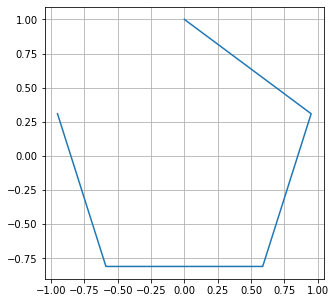

In [5]:
plt.figure(figsize=(5, 5))
plt.plot(neares_points[:, 0], neares_points[:, 1])
plt.grid()
plt.show()